# 1.0 Contextualizando

Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.
Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

*As pessoas desse experimento só verão 1 vídeo cada

*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal

*As amostras são aleatorias e sem viéses sistematicos
Objetivo: Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção

Experimento: 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção. Os vídeos são idênticos com exceção dos animais mostrados:

**250 pessoas aleatorizadas para o vídeo com gato**

**250 pessoas aleatorizadas para o vídeo com cachorro**

Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?


# 2.0 Importando as bibliotecas necessárias

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3.0 Análise descritiva

In [10]:
df = pd.read_csv('/content/drive/MyDrive/EBA/Datasets/cachorro_gato.csv')
df.head()

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


## A variável 'grupo' assume dois valores:

## **0: refere-se ao grupo de pessoas que viram o vídeo do cachorro**
## 1: **refere-se ao grupo de pessoas que viram o vídeo do gato**

## A variável escore é a probabilidade de uma pessoa adotar um cachorro/gato após assistir o vídeo.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   grupo       500 non-null    int64  
 2   escore      500 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [12]:
df.isnull().sum()

Unnamed: 0    0
grupo         0
escore        0
dtype: int64

In [13]:
df.groupby('grupo')['escore'].describe()

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
0,253.0,55.531922,14.665402,16.304739,44.488055,55.802372,66.249013,95.309459
1,247.0,56.744495,14.913287,14.654955,48.682432,56.924405,66.817326,93.259671


A média do escore do grupo 1 (14,91%) é ligeiramente maior que a do grupo 0 (13,66%). O mesmo ocorre em relação à mediana, que também é maior no grupo 1.

No entanto, não podemos afirmar que essas médias são estatisticamente diferentes sem antes realizar um teste de hipóteses.

# 4.0 Distribuição das variáveis

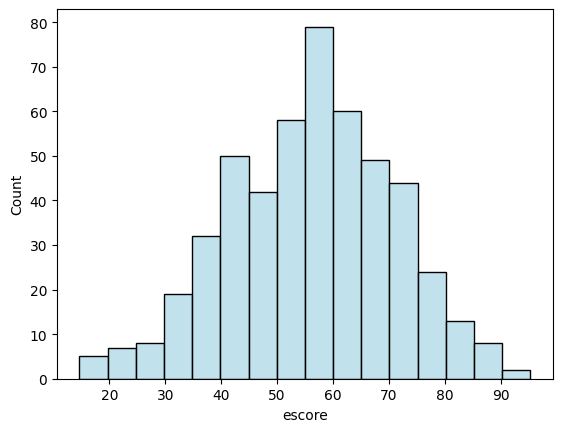

In [37]:
# Distribuição da variável escore
sns.histplot(df['escore'], color='lightblue') ;

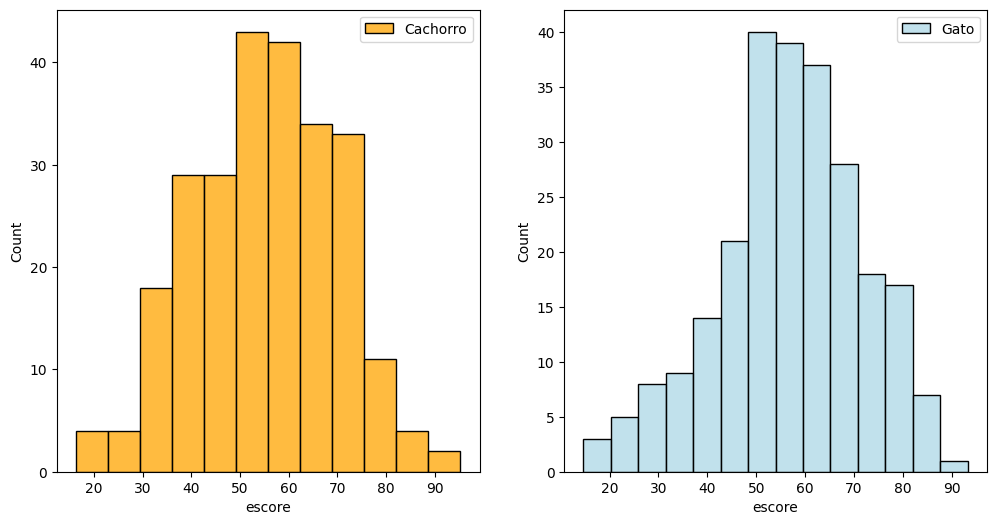

In [35]:
# Distribuição dos grupos (cachorro e gato)
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(1, 2)
sns.histplot(df[df['grupo'] == 0]['escore'], color='orange', label='Cachorro', ax=axes[0])
sns.histplot(df[df['grupo'] == 1]['escore'], color='lightblue', label='Gato', ax=axes[1])
axes[0].legend()
axes[1].legend()
plt.show()

In [16]:
from scipy.stats import skew

In [18]:
skew_grupo_0 = skew(df[df['grupo'] == 0]['escore'])
skew_grupo_1 = skew(df[df['grupo'] == 1]['escore'])

print(f'Skew Grupo 0: {skew_grupo_0}')
print(f'Skew Grupo 1: {skew_grupo_1}')

Skew Grupo 0: -0.10993551217105212
Skew Grupo 1: -0.2606908835840179


Os valores de skew foram próximos de zero, indicando que as distribuições seguem aproximadamente uma normal. Com isso, podemos definir o nosso teste de hipóteses a ser utilizado. Antes, vamos revisar o que temos:

**- O desvio padrão populacional é desconhecido. Temos apenas o desvio padrão amostral.**
___________________________________________________________________________

**- As amostras foram selecionadas aleatoriamente e sem vieses sistemáticos.**
___________________________________________________________________________

**- As amostras são independentes, pois quem viu o vídeo do cachorro não viu o vídeo do gato.**
___________________________________________________________________________

Neste caso, utilizaremos o t-test para duas amostras independentes.

# 5.0 Definição do teste de hipóteses

## **HO: a média amostral do grupo 0 = da média amostral do grupo 1**

## **H1: a média amostral do grupo 0 ≠ da média amostral do grupo 1**



# 5.1 Nível de Significância

### Adotaremos 5% de significância.

In [19]:
alpha = 0.05

In [20]:
from scipy.stats import ttest_ind

In [22]:
grupo_0 = df[df['grupo'] == 0]['escore']
grupo_1 = df[df['grupo'] == 1]['escore']

In [23]:
t_test, p_value = ttest_ind(grupo_0, grupo_1)

print(f't_test: {t_test}')
print(f'p_value: {p_value}')

t_test: -0.9166663411409343
p_value: 0.35976119585131083


# 6.0 Conclusões

In [25]:
if p_value < alpha:
    print('Temos evidências significativas para rejeitar a hipótese nula')
else:
    print('Não temos evidências significativas para rejeitar a hipótese nula, aceitando que as médias entre o grupo de pessoas que viram o vídeo do cachorro e o grupo de pessoas que viram o vídeo do gato são estatisticamente iguais')


Não temos evidências significativas para rejeitar a hipótese nula, aceitando que as médias entre o grupo de pessoas que viram o vídeo do cachorro e o grupo de pessoas que viram o vídeo do gato são estatisticamente iguais
